In [26]:
import sys
import os
sys.path.append(os.path.abspath('../ETL_pipeline'))
from get_data_from_cloud import get_dataframe_from_cloud
from dotenv import load_dotenv
from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

load_dotenv()

# Get environment variables
MONGO_URI = os.getenv('MONGO_URI')
# Create a new client and connect to the server
client = MongoClient(MONGO_URI, server_api=ServerApi('1'))

try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [27]:
df = get_dataframe_from_cloud(client=client, db_name="data", collection_name='emissions')

Pinged your deployment. You successfully connected to MongoDB!


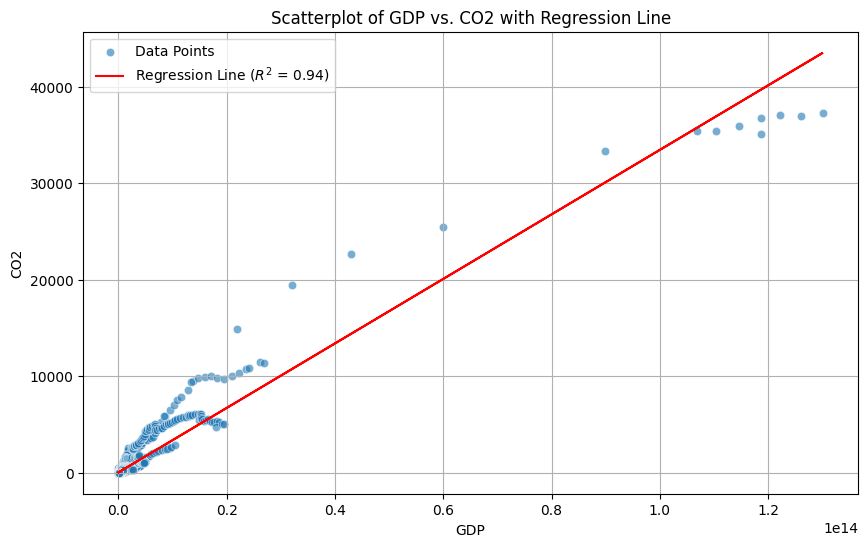

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

cleaned_data = df[~((df['gdp'] == 0) | (df['gdp'].isna()) | (df['gdp'] == ''))]
gdp = cleaned_data['gdp']
co2_emissions = cleaned_data['co2']

X = gdp.values.reshape(-1, 1)
y = co2_emissions.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# calculate R^2
r_squared = r2_score(y, y_pred)

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=gdp, y=co2_emissions, alpha=0.6, label='Data Points')
plt.plot(gdp, y_pred, color='red', label=f'Regression Line ($R^2$ = {r_squared:.2f})')
plt.title('Scatterplot of GDP vs. CO2 with Regression Line')
plt.xlabel('GDP')
plt.ylabel('CO2')
plt.legend()
plt.grid()
plt.show()

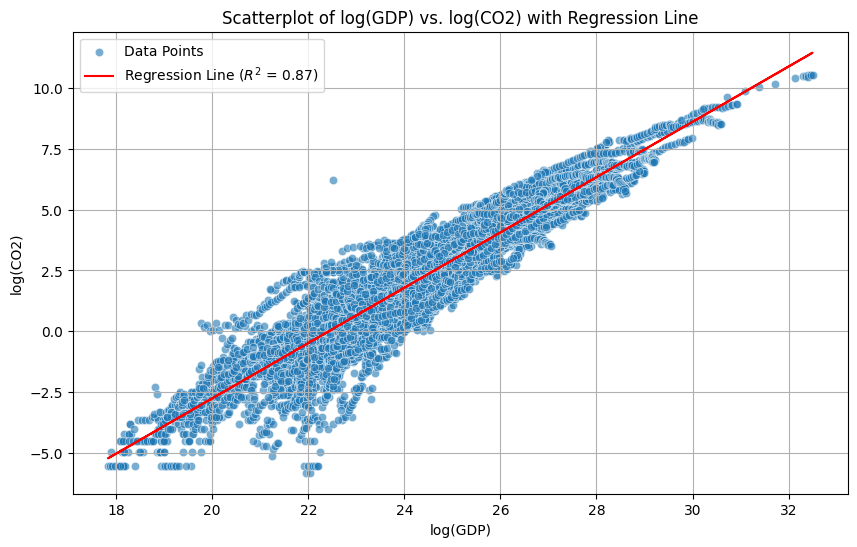

In [32]:
import numpy as np

# filter non-positive GDP or CO2 consumption
cleaned_data = cleaned_data[(cleaned_data['gdp'] > 0) & (cleaned_data['co2'] > 0)]

# log-transform the data
cleaned_data['log_gdp'] = np.log(cleaned_data['gdp'])
cleaned_data['log_co2'] = np.log(cleaned_data['co2'])

# log-transformed data regression
log_gdp = cleaned_data['log_gdp']
log_co2 = cleaned_data['log_co2']
X_log = log_gdp.values.reshape(-1, 1)
y_log = log_co2.values

# linear regression on log-transformed data
model_log = LinearRegression()
model_log.fit(X_log, y_log)
y_pred_log = model_log.predict(X_log)

# calculate R^2
r_squared_log = r2_score(y_log, y_pred_log)

# plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=log_gdp, y=log_co2, alpha=0.6, label='Data Points')
plt.plot(log_gdp, y_pred_log, color='red', label=f'Regression Line ($R^2$ = {r_squared_log:.2f})')
plt.title('Scatterplot of log(GDP) vs. log(CO2) with Regression Line')
plt.xlabel('log(GDP)')
plt.ylabel('log(CO2)')
plt.legend()
plt.grid()

plt.show()
